<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/Informe11_Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema del árbol recubridor mínimo**


Entrada: Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cara arco $e\in E$.

Salida: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.


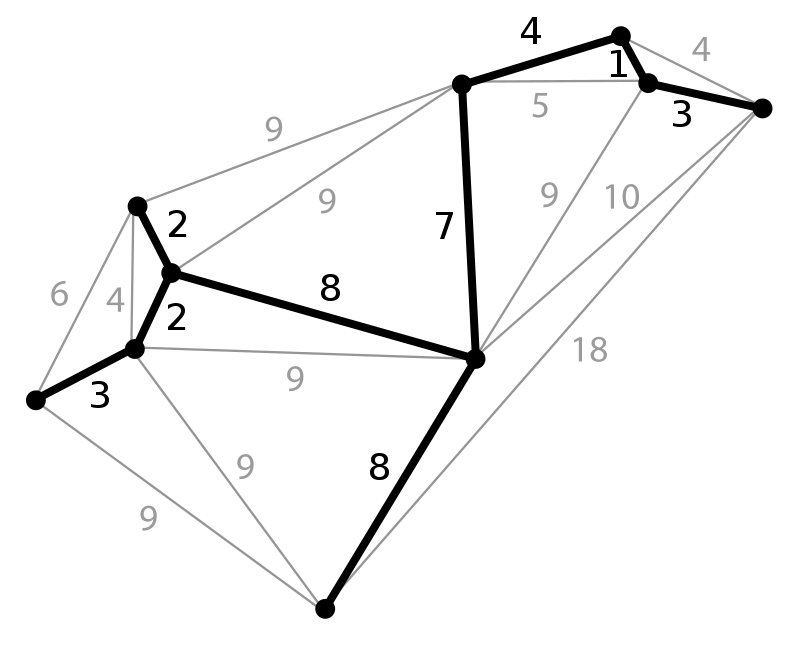

En el siguiente informe se analizará el **problema del árbol recubridor mínimo**, el cual busca la forma de conectar un conjunto de objetos de la forma más económica posible. 

Este es un problema de optimización, ya que se busca reducir el costo total de unir una serie de puntos. Este tiene diversas aplicaciones tales como: Redes de comunicaciones, redes electricas, etc.

Podemos resolver este problema utilizando el **algoritmo de Kruskal**, el cual se implementa mediante un acercamiento **greedy**. Esto se evidencia en que este algoritmo ocupa el arco con menos peso disponible y que no cause un *loop* en el árbol recubridor mínimo ya en construcción. 

# **2. Kruskal**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **Kruskal.**

### Algoritmo Kruskal

In [ ]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from termcolor import colored

class Graph:
 
    def __init__(self, vertices):
        self.V = vertices 
        self.graph = []
 
    # Se utiliza para añadir un arco
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # Verifica si dos nodos estan en el mismo conjunto.
    # Encuentra la raíz del árbol.
    def find(self, parent, i):
        if (parent[i] != i):
            parent[i] = self.find(parent, parent[i])
        return parent[i]
 
    # Une dos conjuntos (arboles)
    def union(self, parent, rank, x, y):
        if (rank[x] < rank[y]):
            parent[x] = y

        elif (rank[x] > rank[y]):
            parent[y] = x
        else:
            parent[y] = x
            rank[x] += 1
 

    def KruskalMST(self, verbose = False, visualize = False):
      # Total de nodos - 1
      n = self.V

      # Almacena el árbol recubridor mínimo
      mst = [] 

      # Se utiliza para la cantidad de arcos almacenados
      e = 0

      if (verbose == True):
        print("Grafo de entrada:\n")
        for u, v, w in (self.graph):
          print(f"(n({colored(u, 'green')}), n({colored(v, 'magenta')}), peso({colored(w, 'blue')}))", end = ",")
        print("\n")
        print("Ordenando el grafo a partir de los pesos...\n")

      # Se ordena el grafo a partir del peso
      self.graph = sorted(self.graph, key=lambda item: item[2])

      if (verbose == True):
        print("Grafo ordenado obtenido:\n")
        for u, v, w in (self.graph):
          print(f"(n({colored(u, 'green')}), n({colored(v, 'magenta')}), peso({colored(w, 'blue')}))", end = " ")
        print("\n")
      # Se utiliza para recorrer el grafo ordenado
      i = 0

      # p es el padre, r el rango(profundidad)
      p = []
      r = []

      # Utilizado para el visualize.
      G = nx.Graph()

      # Se crean v subconjuntos.
      for node in range(n):
        p.append(node)
        r.append(0)

      # Itera hasta que se almacenas n-1 arcos
      while e < n - 1:

        # Se selecciona el menor arco y se aumenta el indice
        u, v, w = self.graph[i]
        i = i + 1

        
        x = self.find(p, u)
        y = self.find(p, v)
        if (verbose == True):
          print(f"El padre de {colored(u, 'magenta')} es {colored(x, 'magenta')}")
          print(f"El padre de {colored(v, 'blue')} es {colored(y, 'blue')}")
        # Si no son del mismo conjunto (No generan ciclos).
        if x != y:
          if (verbose == True):
            print(f"Los padres son distintos {colored(x, 'green')} != {colored(y, 'green')}, por lo que se agrega.\n")
          e = e + 1
          mst.append([u, v, w])
          self.union(p, r, x, y)

        elif (verbose == True):
            print(f"Los padres son iguales {colored(x, 'red')} = {colored(y, 'red')}, por lo que se descarta.\n")

      m = 0
      # Se obtiene el peso mínimo.
      for u, v, w in mst:
        m += w
        # Se añaden los arcos
        if (visualize == True):
          G.add_node(u)
          G.add_node(v)
          G.add_edge(u, v, weight = w)
      
      if (visualize == True):
        pos = graphviz_layout (G, prog = "twopi")
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx(G, pos)
        nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

      if (verbose == True):
        print("\nEl MST encontrado es:", mst)
        print(f"La suma mínima de los pesos es: {colored(m, 'yellow')}")  

      return mst, m

g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4) 

mst, m = g.KruskalMST()

## 2.2. Descripción del algoritmo

El algoritmo recibe como datos de entrada un grafo

**Pasos que sigue el algoritmo**

1. Ordenamos el grafo de menor a mayor a partir del peso de los arcos.

2. Se comienza seleccionado el arco con menor peso.

3. Se revisa que el arco seleccionado no cree un bucle, es decir que une dos nodos con distinto padre, de ser así este se añade al $MST$, por otro lado no se toma en cuenta 

4. Estos pasos (2 y 3) se repiten hasta que tengamos N-1 arcos en el $MST$.

5. Se retorna el $MST$.


## 2.3. Ejemplo del algoritmo 


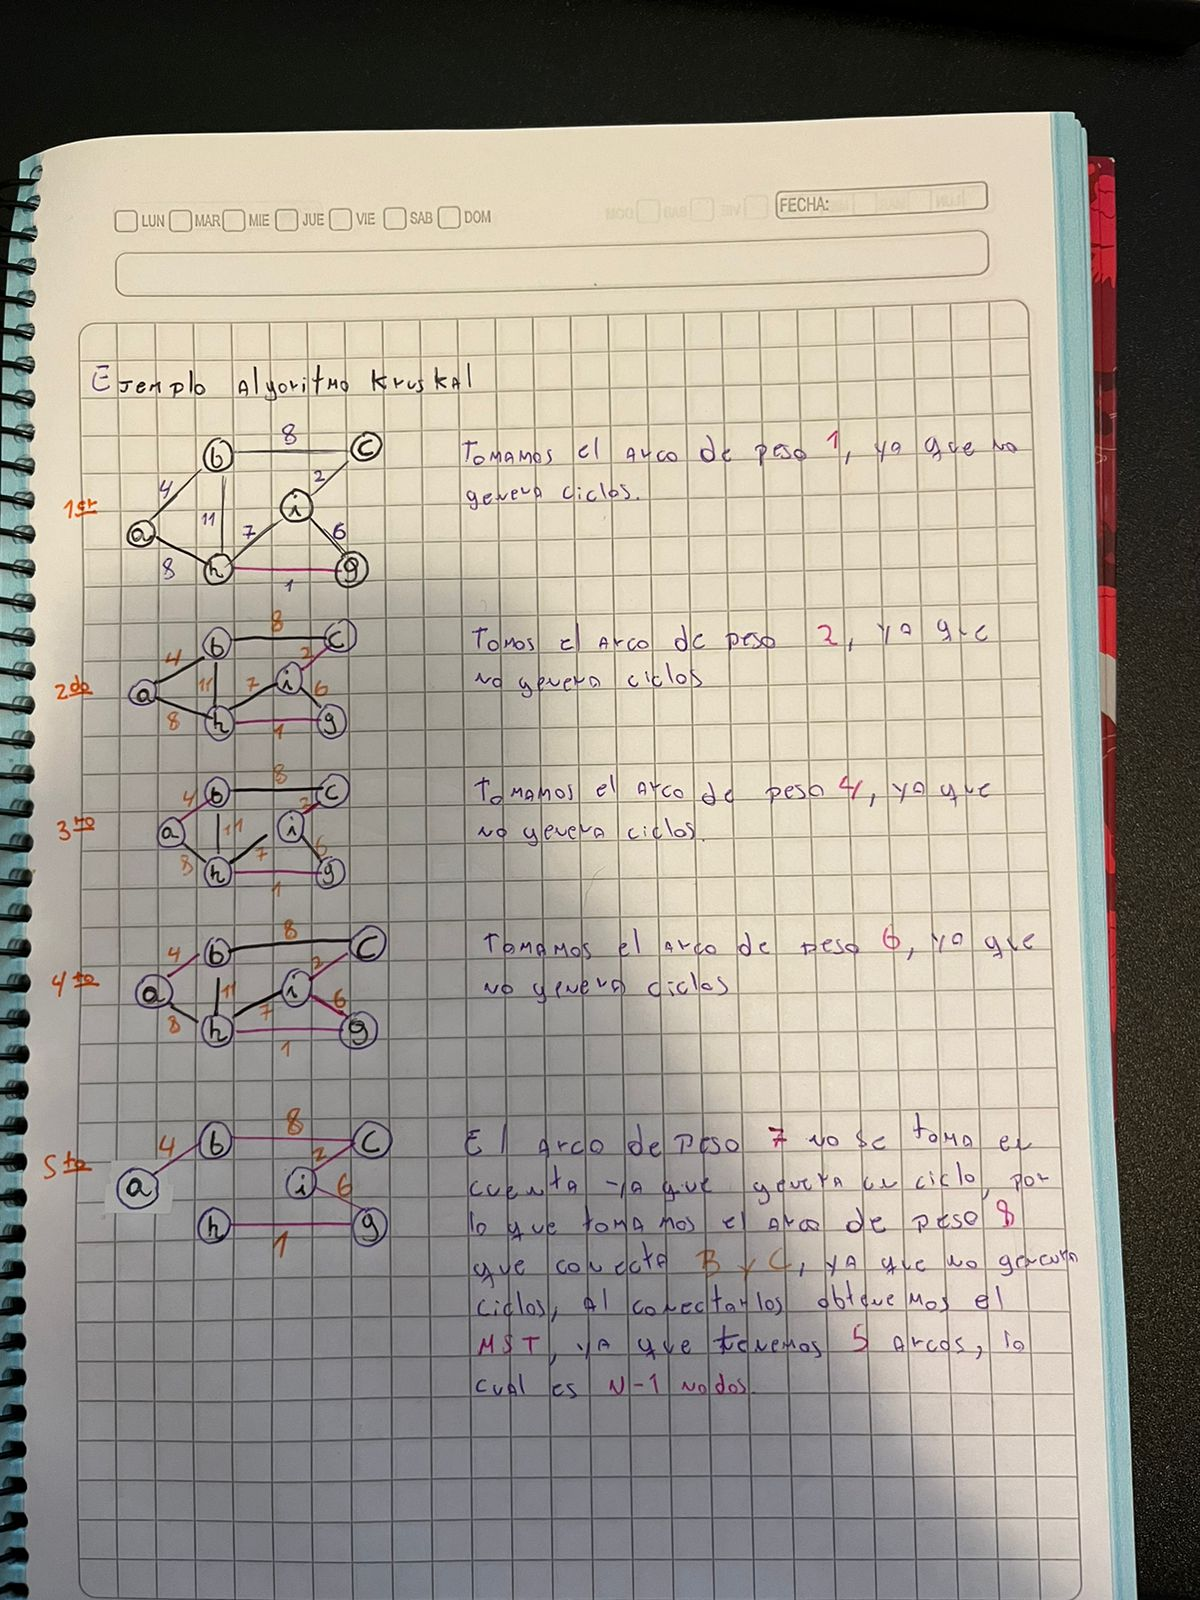

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$ y $visualize = True$

Utilizando la opción $verbose = True$, podemos ver lo que ocurre en cada iteración del algoritmo. Por otro lado al usar visualize podemos ver el MST obtenido de manera visual.


In [ ]:
import random

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def graph_instance_creator(V):
  graph = Graph(V)
  grapP = GraphP(V)
  for i in range(V):
    for j in range(i+1, V):
      n = random.randint(1, 500)
      graph.addEdge(i, j, n)
      grapP.add(i, j, n) 
  return graph, grapP

Grafo de entrada:

(n(0), n(1), peso(66)),(n(0), n(2), peso(414)),(n(0), n(3), peso(6)),(n(0), n(4), peso(335)),(n(0), n(5), peso(37)),(n(1), n(2), peso(454)),(n(1), n(3), peso(397)),(n(1), n(4), peso(290)),(n(1), n(5), peso(189)),(n(2), n(3), peso(469)),(n(2), n(4), peso(217)),(n(2), n(5), peso(137)),(n(3), n(4), peso(394)),(n(3), n(5), peso(294)),(n(4), n(5), peso(334)),

Ordenando el grafo a partir de los pesos...

Grafo ordenado obtenido:

(n(0), n(3), peso(6)) (n(0), n(5), peso(37)) (n(0), n(1), peso(66)) (n(2), n(5), peso(137)) (n(1), n(5), peso(189)) (n(2), n(4), peso(217)) (n(1), n(4), peso(290)) (n(3), n(5), peso(294)) (n(4), n(5), peso(334)) (n(0), n(4), peso(335)) (n(3), n(4), peso(394)) (n(1), n(3), peso(397)) (n(0), n(2), peso(414)) (n(1), n(2), peso(454)) (n(2), n(3), peso(469)) 

El padre de 0 es 0
El padre de 3 es 3
Los padres son distintos 0 != 3, por lo que se agrega.

El padre de 0 es 0
El padre de 5 es 5
Los padres son distintos 0 != 5, por lo que se agrega.

El pad

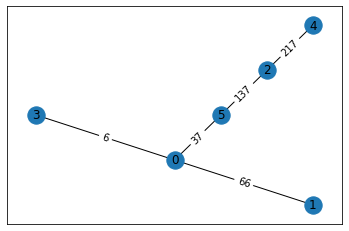

In [ ]:
g, gs = graph_instance_creator(6)
mst, m = g.KruskalMST(verbose = True, visualize = True)

#**3. Tiempo de ejecución**

Teorema: El algoritmo de kruskal posee un tiempo de ejecución de $O(e \cdot log(e))$ en todos los casos.

Para poder explicar el tiempo de ejecución del algoritmo de kruskal hay que explicar el tiempo de ejecución de la operación `union-find`

$O(log(E))$ al máximo para la primera iteración 

$O(log(E))$ al máximo para la segunda iteración 

Se sabe que la cantidad de arcos puede ser a lo máximo $O(V^2)$ y como mínimo $\Omega(V)$

El algoritmo de kruskal primero recorre cada nodo y crea un arbol. Esto tiene complejidad $O(V)$.

Posteriormente se ordena el arreglo de $V$ arcos, con quicksort esto tiene una complejidad $O(V \log(V))$

Luego para cada arco $E$ se aplica la operación `union-find`


**Teorema**: El algoritmo de kruskal posee un tiempo de ejecución de $\Theta(E \cdot log(V))$

Se tiene que 

$$
T(n) = O(1) + O(V) + 
O(V \log (V)) + 
O(E) \cdot O(\log (V^2))
$$

$\log(V^2) = 2 \log(V)$. Luego

$$
T(n) = O(1) + O(V) + 
O(V \log (V)) + 
2 \cdot O(E) \cdot O(\log (V))
$$


Sabiendo que $E \leq V^2$

$$
T(n) = O(E \log (V))
$$

## Complejidad espacial



Se requiere de un espacio de $O(v)$, necesario para realizar un seguimiento de todos los vértices al principio y los subconjuntos respectivos.

Por otro lado se requiere $O(e)$, necesario para realizar un seguimiento de todos los arcos ordenados que se incluyen en ARB (árbol recubridor mínimo).

Por lo que la complejidad espacial del algoritmo es $O(v + e)$.

# **4. Correctitud**

Hipotesis: Para cualquier grafo conectado $G=(V,E)$, y costos reales para sus arcos, el algoritmo de Kruskal retorna un árbol recubridor mínimo de $G$

Primero, $T$ es un árbol recubridor. Esto es porque:


*   $T$ es un **bosque**. Nunca se crean ciclos. 
*   $T$ es **recubridor**. Supongamos que hay un vértice $v$ que no es incidente con los arcos de $T$. Entonces los arcos incidentes de $v$ tienen que haber sido considerados en el algoritmo en algún punto. El primer arco (del orden de arcos) habría sido incluído porque no puede haber creado un ciclo, lo que contradice la definición de $T$.
*   $T$ está **conectado**. Supongamos que $T$ no está conectado. Entonces $T$ tiene dos o más componentes conectados. Ya que $G$ está conectado, entonces estos componentes tienen que haber sido conectados por algunos arcos en $G$, no en $T$. El primero de estos arcos (del orden de arcos) habría sido incluído en $T$ porque no podría haber creador un ciclo, lo que contradice la definición de $T$. 

En segundo lugar, $T$ es un árbol recubridor mínimo. Vamos a comprobar esto ocupando **inducción**. Supongamos que $T$ es un árbol recubridor mínimo. Si $T = T'$, entonces $T$ es un árbol recubridor mínimo. Si $T \neq T'$, entonces existe un arco $e ∈ T'$ de *peso mínimo* que no está en $T$. Además, $T \cup e$ contiene un ciclo $C$ de modo que:


*   Cada arco en $C$ tiene un peso menor que $wt (e)$ (Esto sigue desde cómo el algoritmo construyó $T$). 
*   Hay algún arco $f$ en $C$ que no está en $T'$ (Porque $T'$ no tiene el ciclo $C$).

Considere el árbol $\{T_2 = T / {e} ∪ {f}\}$:



*   $T_2$ es un árbol recubridor.
*   $T_2$ tiene más arcos en común con $T'$ que con $T$. 
*   Y $wt(T_2)$ > $wt(T)$ (Intercambiamos un arco con otro que no sea más caro).

Podemos rehacer el mismo proceso con $T_2$ para encontrar un árbol recubridor $T_3$ con más arcos en común con $T'$. Por inducción, podemos continuar este proceso hasta que alcancemos $T'$, de lo que vemos:

$wt(T) <= wt(T_2) <= wt(T_3) <= ... <= wt(T')$.

Ya que $T'$ es un árbol recubridor mínimo, entonces estas desigualdades deben ser igualdades y concluímos que $T$ es un árbol recubridor mínimo. 










# **5. Experimentos.**

## **5.1. Tiempo de ejecución**

En los siguientes gráficos se reporta el tiempo de ejecución del algoritmo **Kruskal** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

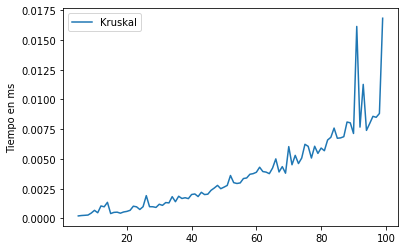

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
for n in range(5, 100):
  G, g = graph_instance_creator(n)

  t1 = repeat(setup="from __main__ import Graph", stmt = lambda: G.KruskalMST(), number = 10, repeat = 1)
  x.append(n)
  y.append(t1)


plt.plot(x, y)
plt.legend(["Kruskal"])

plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**



* Lo primero que podemos ver es que la gráfica crece de manera logaritmica tal y como era de esperarse, ya que su tiempo de ejecución es el siguiente: $O(E \log (V))$

* Por otro lado podemos notar que el algoritmo soluciona el problema de una forma muy rápida, esto debido a que es de tipo **Greedy**, por lo cual no entrega un resultado en un tiempo muy pequeño.

## **5.2. Kruskal v/s Prim**

En los siguientes gráficos se reporta el tiempo de ejecución del algoritmo **Kruskal** y ** Prim** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $100$.

PRIM

In [ ]:
import sys  # Library for INT_MAX
 
 
class GraphP():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def add(self, a, b, c):
      self.graph[a][b] = c
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
        # Initialize min value
        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1  # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

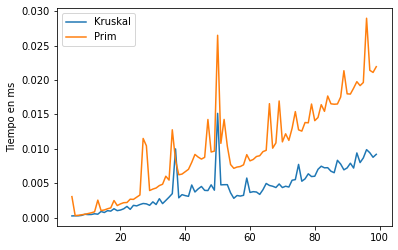

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]; y1=[]
for n in range(5, 100):
  G, GP = graph_instance_creator(n)

  t1 = repeat(setup="from __main__ import Graph", stmt = lambda: G.KruskalMST(), number = 10, repeat = 1)
  t2 = repeat(setup="from __main__ import GraphP", stmt = lambda: GP.primMST(), number = 10, repeat = 1)
  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Kruskal", "Prim"])

plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

* Al ver el gráfico, podemos notar que el algoritmo de kruskal es mas eficiente que el de prim en tiempo de ejecución, tal y como era de esperarse por sus respectivos tiempos $O(E \log (V))$ < $O(v^2)$.

* Por otro lado las graficas generadas son correctas, ya que el algoritmo de **kruskal** crece logaritmicamente y el de **prim** crece de manera cuadrática.

* Además, podemos notar que se presentan fluctuaciones en los mismos puntos, por lo que se asume que se debe a la maquina virtual de google colab. Esto debido a que el algoritmo de **prim** depende netamente de la cantidad de nodos, distinto hubiera sido si era solo el algoritmo de **kruskal**, ya que ese podría haber sido el caso en donde se presenta una mayor cantidad de arcos respecto a los nodos.

* Finalmente podemos notar que el algoritmo de **prim** depende netamente de los nodos, ya que a medida que estos aumentan su tiempo va aumentando significativamente por el tiempo que toma recorrer la matriz.